In [34]:
import cv2
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [35]:
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test"

In [36]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

Shape:  (458, 800, 3)
Label:  day


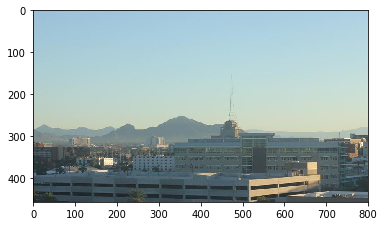

In [37]:
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

plt.imshow(selected_image)
print("Shape: ", selected_image.shape)
print("Label: ", selected_label)

In [38]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image so that all "standard" images are the same size 600x1100 (hxw) 
    standard_im = cv2.resize(image, (1100, 600), interpolation=cv2.INTER_AREA)
    
    return standard_im

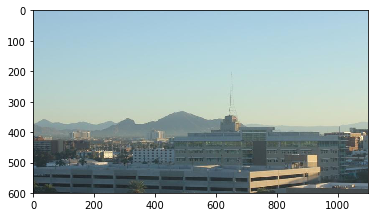

In [39]:
standardized_image = standardize_input(selected_image)
plt.imshow(standardized_image)

### TODO: Standardize the output

With each loaded image, you also need to specify the expected output. For this, use binary numerical values 0/1 = night/day.

In [40]:
# Examples: 
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
        
    numerical_val = 0
    ## TODO: complete the code to produce a numerical label
    if label == "day":
        numerical_val = 1
    elif label == "night":
        numerical_val = 0
    
    return numerical_val

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work!

In [41]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []
    
    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]
        
        # standardize the image
        standardized_im = standardize_input(image)
        
        # create a numerical label
        binary_label = encode(label)
        
        # append the image, and it's one hot encoded label to the full, processed list of image data
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: 


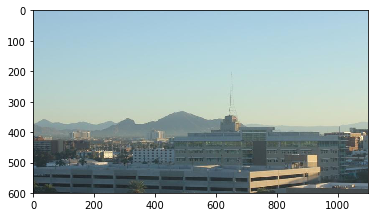

In [43]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: ")

# Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


## RGB to HSV conversion

Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.